###EMPLOYEE ATTRITION PREDICTION PROJECT
By: Mehak Arora (03601192023), AI/ML, 4th sem

#PROJECT FLOW:
####AFTER RUNNING DIFFERENT MODELS ON RAW DATASETS WE INFERRED THAT :
#### WE HAVE IMBALANCED DATASET HENCE WE WILL USE DIFFERENT TECHNIQUES TO HANDLE THE SAME
###The models performed better for the majority class (class 0) but struggles with the minority class (class 1). The lower recall for class 1 indicates that the model does not identify many of the actual class 1 cases.



####Handling Imbalance:
1)Resampling: Either oversample the minority class or undersample the majority class to balance the dataset.

2)Synthetic Data Generation: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.

Trying Hybrid Methods:
1)SMOTE-Tomek Links: Combines SMOTE for oversampling and Tomek Links for cleaning the majority class.
2)SMOTE-ENN: Uses SMOTE to generate synthetic samples and ENN for cleaning.

### To improve performances of several models we used PCA,HyperParameter Tunning and Cross Validation
###Evaluation is done on the basis of accuracy score,ROC/AUC Score


###Random Forest Classifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/Employee Attrition Project/dataset.csv'

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

data=pd.read_csv(file_path)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#dropping duplicates
data.drop_duplicates(inplace=True)

# Find columns with only one unique value
unique=data.nunique()
same_value=unique[unique==1].index.to_list()
print(same_value)
#dropping these columns
data=data.drop(same_value,axis=1)
#dropping marital status,Employee Number-unnecessary
data=data.drop(["MaritalStatus","EmployeeNumber"],axis=1)
#dropping Gender-In Accordance with chi-square test
data=data.drop("Gender",axis=1)
#Converting Attrition columns to int type
data['Attrition']=data['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
#Dropping the mentioned columns
data=data.drop(["PerformanceRating","HourlyRate","PercentSalaryHike","JobLevel"],axis=1)
#separating categorical data from the data for furthur processing
def separate(data):
  cat_data_columns=data.select_dtypes(include=["object"]).columns
  cat_data=data[cat_data_columns]
  return cat_data
cat_data=separate(data)
data=data.drop(cat_data.columns,axis=1)
print(cat_data.head())
#overtime-binary classification
cat_data["OverTime"]=cat_data["OverTime"].apply(lambda x:0 if x=="No" else 1)
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
#JobRole, EducationField,Department,BusinessTravel require encoding
for column in ["JobRole", "EducationField","Department","BusinessTravel"]:
    cat_data[column] = label_encoder.fit_transform(cat_data[column])
cat_data.head()
#EXTRACTING THE DEPENDENT VARIABLE(Attrition)
y=data["Attrition"]
data.drop("Attrition",axis=1,inplace=True)
y.head()
# MERIGING cat_data ,cat_data_dummies to the original dataset-to get our matrix of features
X=pd.concat([data,cat_data],axis=1)
X.head()

['EmployeeCount', 'Over18', 'StandardHours']
      BusinessTravel              Department EducationField  \
0      Travel_Rarely                   Sales  Life Sciences   
1  Travel_Frequently  Research & Development  Life Sciences   
2      Travel_Rarely  Research & Development          Other   
3  Travel_Frequently  Research & Development  Life Sciences   
4      Travel_Rarely  Research & Development        Medical   

                 JobRole OverTime  
0        Sales Executive      Yes  
1     Research Scientist       No  
2  Laboratory Technician      Yes  
3     Research Scientist      Yes  
4  Laboratory Technician       No  


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,JobRole,OverTime
0,41,1102,1,2,2,3,4,5993,19479,8,...,1,6,4,0,5,2,2,1,7,1
1,49,279,8,1,3,2,2,5130,24907,1,...,3,10,7,1,7,1,1,1,6,0
2,37,1373,2,2,4,2,3,2090,2396,6,...,3,0,0,0,0,2,1,4,2,1
3,33,1392,3,4,4,3,3,2909,23159,1,...,3,8,7,3,0,1,1,1,6,1
4,27,591,2,1,1,3,2,3468,16632,9,...,3,2,2,2,2,2,1,3,2,0


In [ ]:

def helper(X_train,X_test,y_train,y_test,model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"=======================Model: Random_Forest ==========================")
    print(f"              Accuracy: {accuracy_score(y_test,y_pred)}")
    ROCAUCscore = roc_auc_score(y_test, y_pred)
    print(f"              AUC-ROC Curve : {ROCAUCscore:.4f}")
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print()

    fpr, tpr, thresholds=roc_curve(y_test, y_pred)
    roc_auc=auc(fpr, tpr)
    #Plotting ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

## Testing model on RAW dataset


=======================Model: Random_Forest ==========================
              Accuracy: 0.8197278911564626
              AUC-ROC Curve : 0.5137
[[238   9]
 [ 44   3]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       247
           1       0.25      0.06      0.10        47

    accuracy                           0.82       294
   macro avg       0.55      0.51      0.50       294
weighted avg       0.75      0.82      0.77       294




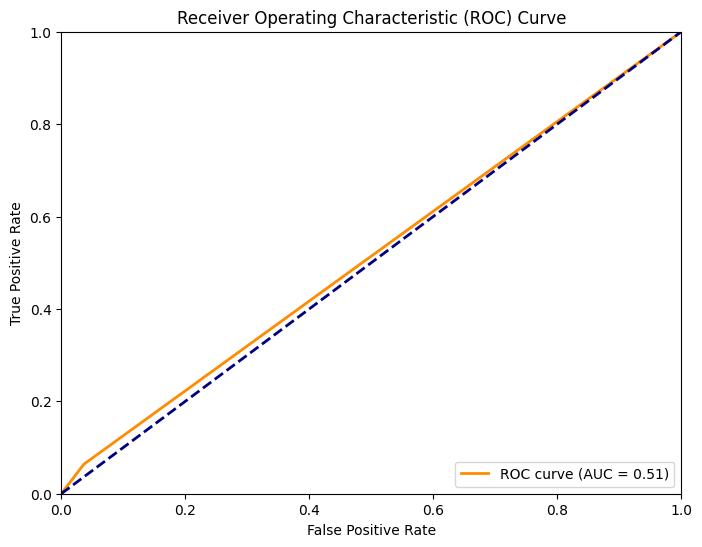

In [ ]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
helper(X_train,X_test,y_train,y_test,RandomForestClassifier())

## Testing model USING PCA


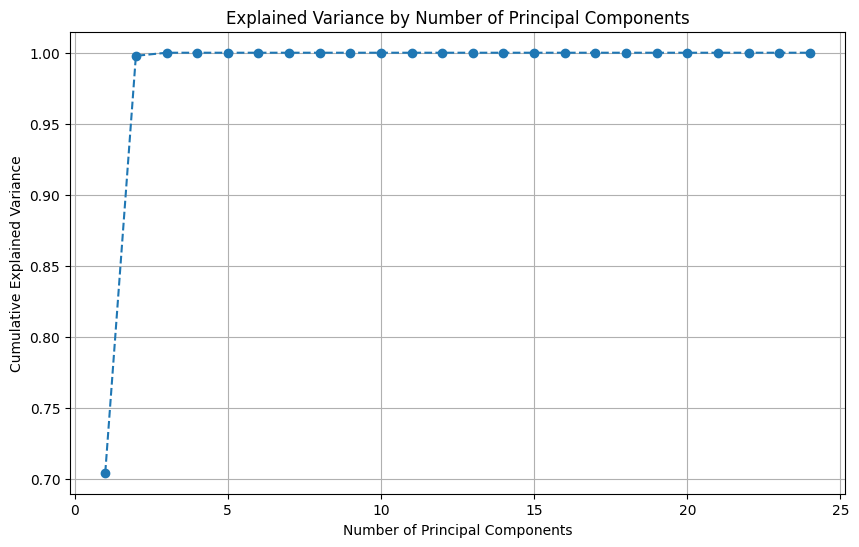

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(X_train)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


In [ ]:

#Applying PCA(Principal Component Analysis)- A statistical technique used for dimensionality reduction and feature extraction.
#It helps in feature reduction in dataset while retaining as much information(variance) as possible.
#It requires a standardized dataset
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(X_train)
n_components=pca.n_components_
explained_variance=pca.explained_variance_ratio_
cumulative_variance=pca.explained_variance_ratio_.cumsum()

print(f"Selected number of components: {n_components}")
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative variance: {cumulative_variance}")
print()

pca_df=pd.DataFrame(pca_result)
pca_df.head()


Selected number of components: 2
Explained variance ratio: [0.70439715 0.29341589]
Cumulative variance: [0.70439715 0.99781304]



,0,1
0,7156.377423,9083.459910
1,4702.702886,-4261.226060
2,1749.715465,10846.339421
3,11749.522926,-5040.390727
4,5186.611110,-1124.518710


In [ ]:
print(pca_df.shape)
print(y_train.shape)

(1176, 2)
(1176,)


=======================Model: Random_Forest ==========================
              Accuracy: 0.8197278911564626
              AUC-ROC Curve : 0.5482
[[234  13]
 [ 40   7]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       247
           1       0.35      0.15      0.21        47

    accuracy                           0.82       294
   macro avg       0.60      0.55      0.55       294
weighted avg       0.77      0.82      0.79       294




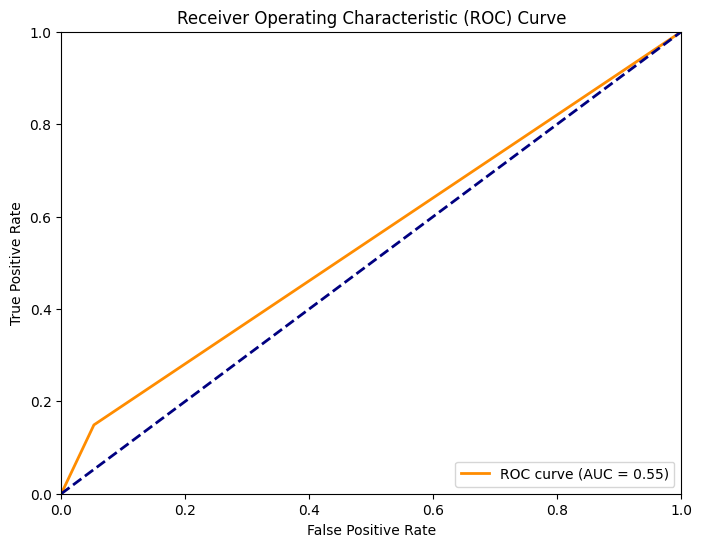

In [ ]:

X_test = pca.transform(X_test)
helper(pca_df,X_test,y_train,y_test,RandomForestClassifier())

# OVERSAMPLING


In [ ]:
!pip install imblearn

## Random Oversampling








=======================Model: Random_Forest ==========================
              Accuracy: 0.9676113360323887
              AUC-ROC Curve : 0.9676
[[233  14]
 [  2 245]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       247
           1       0.95      0.99      0.97       247

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494




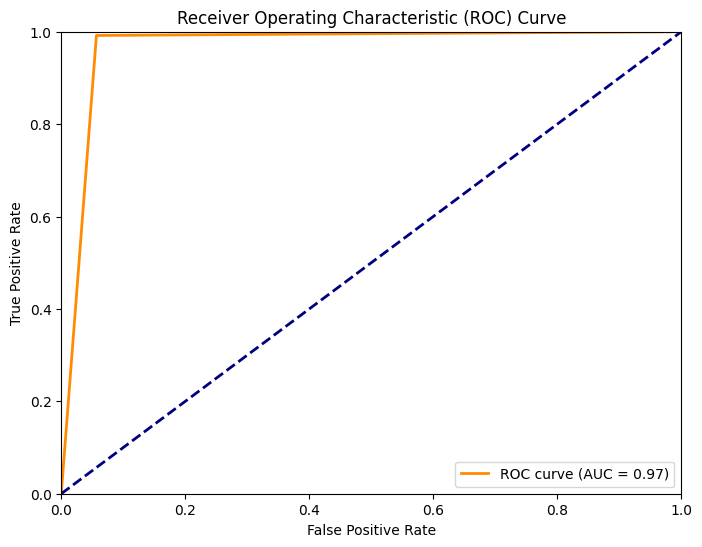

In [ ]:

from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_resampled,y_resampled=ros.fit_resample(X,y)

X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled=train_test_split(X_resampled,y_resampled,stratify=y_resampled,test_size=0.2,random_state=42)
helper(X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

##### PCA

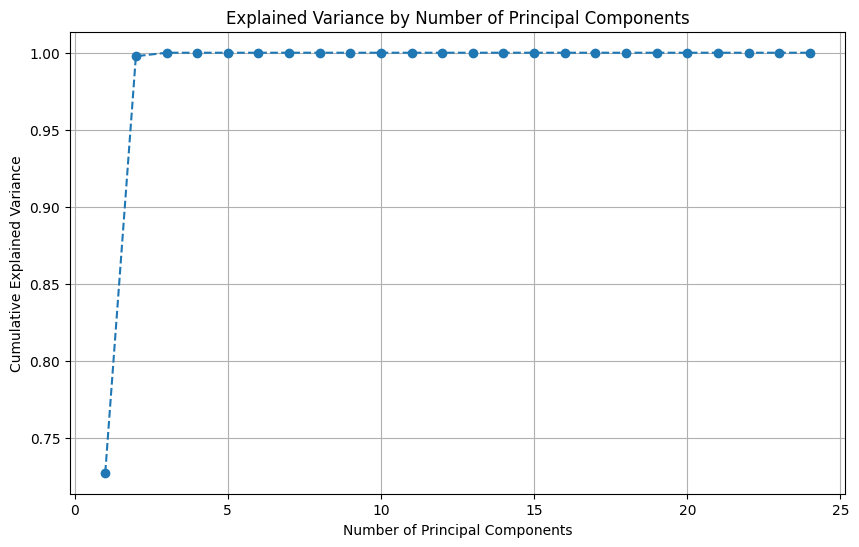

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(X_train_resampled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(X_train_resampled)
n_components=pca.n_components_
explained_variance=pca.explained_variance_ratio_
cumulative_variance=pca.explained_variance_ratio_.cumsum()

print(f"Selected number of components: {n_components}")
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative variance: {cumulative_variance}")
print()

pca_df=pd.DataFrame(pca_result)
pca_df.head()
X_test_resampled=pca.transform(X_test_resampled)

Selected number of components: 2
Explained variance ratio: [0.7276727  0.27004922]
Cumulative variance: [0.7276727  0.99772193]



=======================Model: Random_Forest ==========================
              Accuracy: 0.9068825910931174
              AUC-ROC Curve : 0.9069
[[203  44]
 [  2 245]]
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       247
           1       0.85      0.99      0.91       247

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494




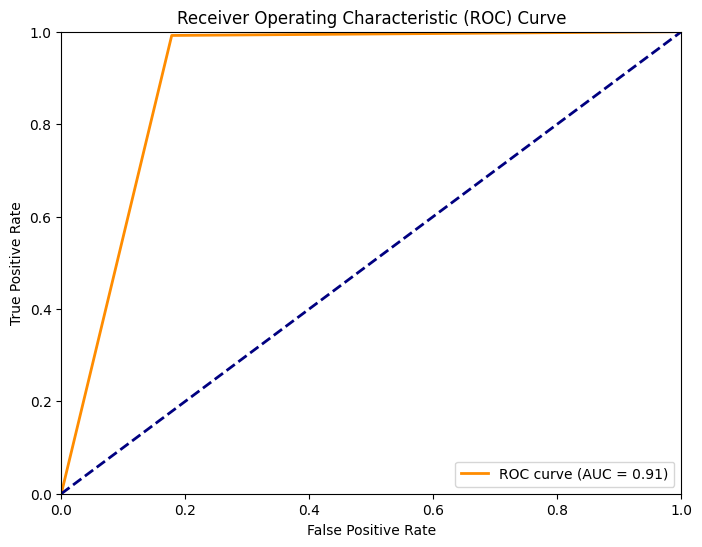

In [ ]:

helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

####HyperParameterTuning

Fitting 3 folds for each of 100 candidates, totalling 300 fits
=======================Model: Random_Forest ==========================
              Accuracy: 0.9129554655870445
              AUC-ROC Curve : 0.9130
[[206  41]
 [  2 245]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       247
           1       0.86      0.99      0.92       247

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494




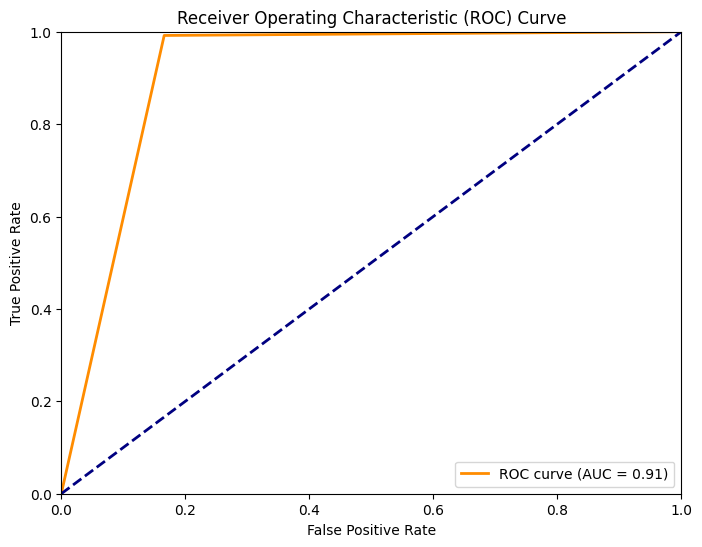

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid={'n_estimators':[100,200,300],
               'max_features': ['log2', 'sqrt'],
               'max_depth':[10,20,40,None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
}
rcv = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = grid, n_iter=100,cv = 3, verbose=2, random_state=0, n_jobs = -1)
helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,rcv)


In [ ]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

####CROSS VALIDATION

In [ ]:

from sklearn.model_selection import cross_validate


def cross_val_evaluation(model, X, y):
    # Perform cross-validation with ROC AUC
    results = cross_validate(model, X, y, cv=5,
                             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                             return_train_score=False)

    # Calculate mean scores
    mean_accuracy = np.mean(results['test_accuracy'])
    mean_precision = np.mean(results['test_precision'])
    mean_recall = np.mean(results['test_recall'])
    mean_f1 = np.mean(results['test_f1'])
    mean_roc_auc = np.mean(results['test_roc_auc'])

    # Print results using f-strings
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean F1 Score: {mean_f1:.4f}")
    print(f"Mean ROC AUC: {mean_roc_auc:.4f}")


In [ ]:
cross_val_evaluation(RandomForestClassifier(),X_resampled,y_resampled)

Mean Accuracy: 0.9846
Mean Precision: 0.9702
Mean Recall: 1.0000
Mean F1 Score: 0.9848
Mean ROC AUC: 0.9999


## SMOTE-Synthetic Minority Oversampling Technique








=======================Model: Random_Forest ==========================
              Accuracy: 0.8967611336032388
              AUC-ROC Curve : 0.8968
[[221  26]
 [ 25 222]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       247
           1       0.90      0.90      0.90       247

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494




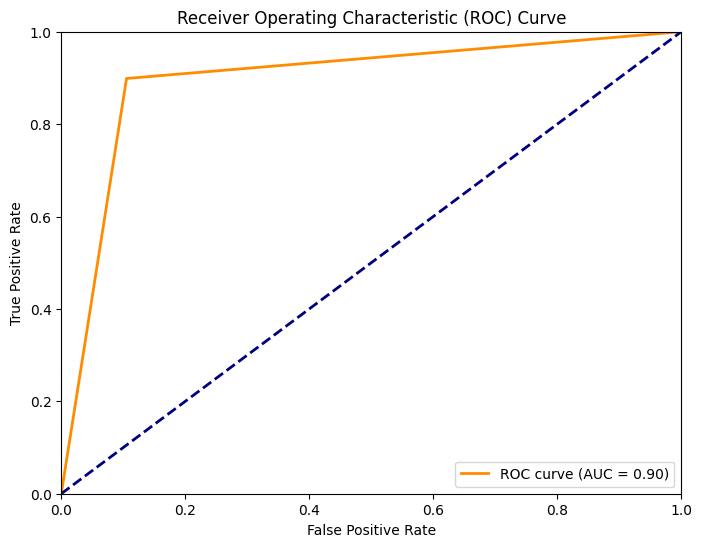

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0,k_neighbors=5)
X_resampled,y_resampled=sm.fit_resample(X,y)
X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled=train_test_split(X_resampled,y_resampled,stratify=y_resampled,test_size=0.2,random_state=42)
helper(X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

##### PCA

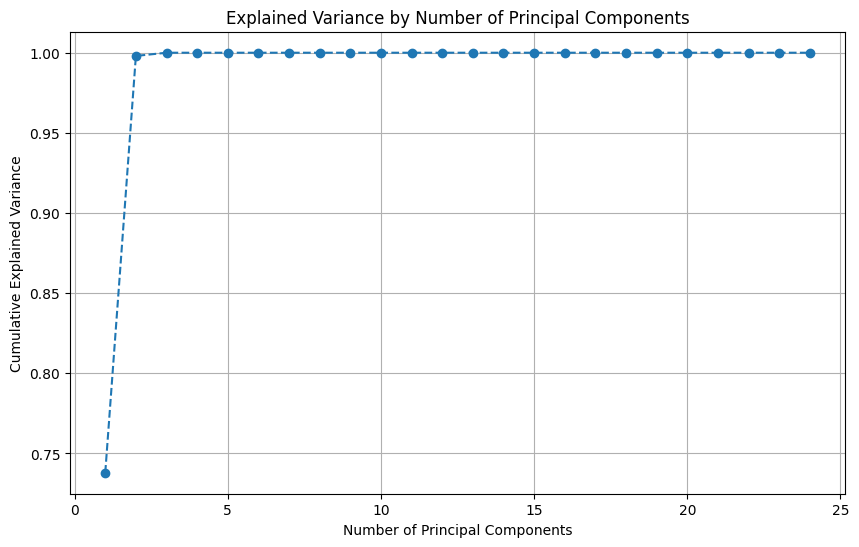

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(X_train_resampled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(X_train_resampled)
n_components=pca.n_components_
explained_variance=pca.explained_variance_ratio_
cumulative_variance=pca.explained_variance_ratio_.cumsum()

print(f"Selected number of components: {n_components}")
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative variance: {cumulative_variance}")
print()

pca_df=pd.DataFrame(pca_result)
pca_df.head()
X_test_resampled=pca.transform(X_test_resampled)

Selected number of components: 2
Explained variance ratio: [0.73798871 0.26001222]
Cumulative variance: [0.73798871 0.99800093]



=======================Model: Random_Forest ==========================
              Accuracy: 0.7469635627530364
              AUC-ROC Curve : 0.7470
[[174  73]
 [ 52 195]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.74       247
           1       0.73      0.79      0.76       247

    accuracy                           0.75       494
   macro avg       0.75      0.75      0.75       494
weighted avg       0.75      0.75      0.75       494




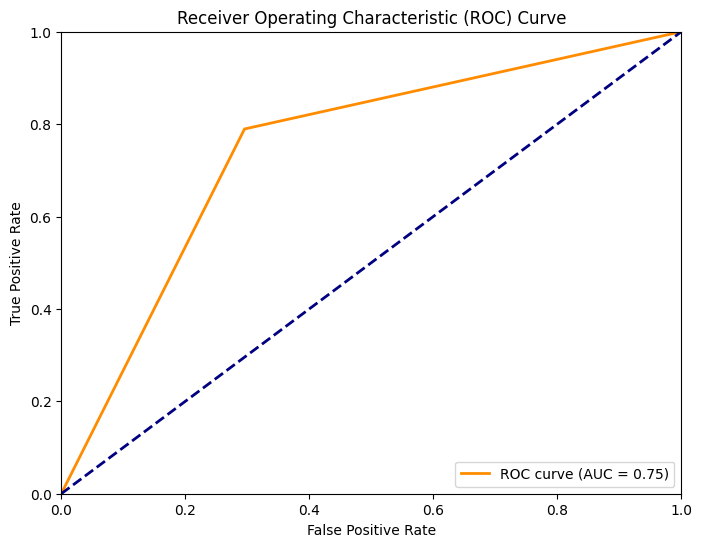

In [ ]:

helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

####HyperParameterTuning

Fitting 3 folds for each of 100 candidates, totalling 300 fits
=======================Model: Random_Forest ==========================
              Accuracy: 0.7388663967611336
              AUC-ROC Curve : 0.7389
[[174  73]
 [ 56 191]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       247
           1       0.72      0.77      0.75       247

    accuracy                           0.74       494
   macro avg       0.74      0.74      0.74       494
weighted avg       0.74      0.74      0.74       494




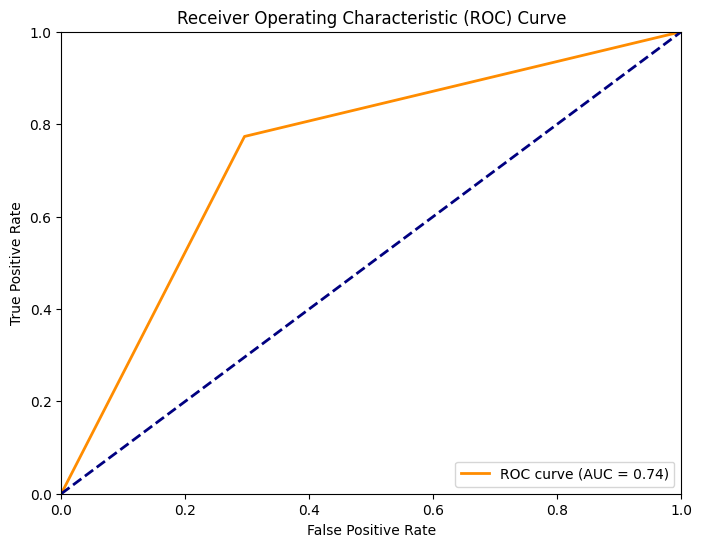

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid={'n_estimators':[100,200,300],
               'max_features': ['log2', 'sqrt'],
               'max_depth':[10,20,40,None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
}
rcv = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = grid,n_iter=100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,rcv)


In [ ]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

####CROSS VALIDATION

In [ ]:

from sklearn.model_selection import cross_validate


def cross_val_evaluation(model, X, y):
    # Perform cross-validation with ROC AUC
    results = cross_validate(model, X, y, cv=5,
                             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                             return_train_score=False)

    # Calculate mean scores
    mean_accuracy = np.mean(results['test_accuracy'])
    mean_precision = np.mean(results['test_precision'])
    mean_recall = np.mean(results['test_recall'])
    mean_f1 = np.mean(results['test_f1'])
    mean_roc_auc = np.mean(results['test_roc_auc'])

    # Print results using f-strings
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean F1 Score: {mean_f1:.4f}")
    print(f"Mean ROC AUC: {mean_roc_auc:.4f}")



In [ ]:
cross_val_evaluation(RandomForestClassifier(),X_resampled,y_resampled)

Mean Accuracy: 0.9019
Mean Precision: 0.9182
Mean Recall: 0.8825
Mean F1 Score: 0.8895
Mean ROC AUC: 0.9681


## ADASYN-Adaptive Synthetic Sampling








=======================Model: Random_Forest ==========================
              Accuracy: 0.8997912317327766
              AUC-ROC Curve : 0.8990
[[228  19]
 [ 29 203]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       247
           1       0.91      0.88      0.89       232

    accuracy                           0.90       479
   macro avg       0.90      0.90      0.90       479
weighted avg       0.90      0.90      0.90       479




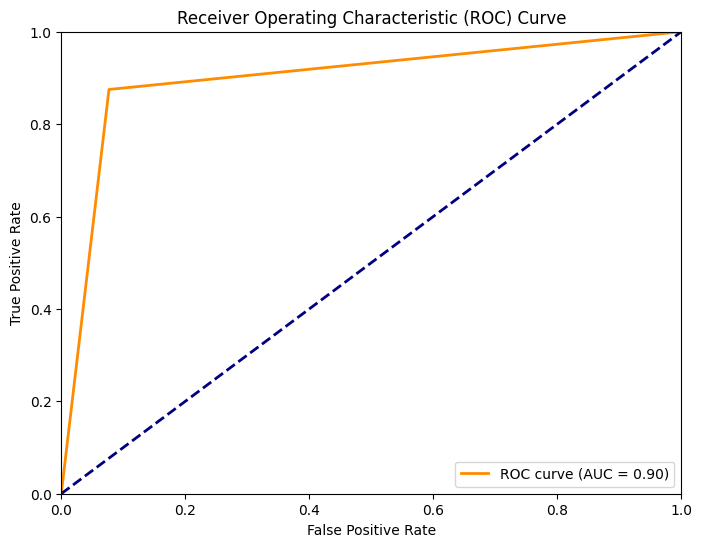

In [ ]:
from imblearn.over_sampling import ADASYN
ad=ADASYN(random_state=0,n_neighbors=5)
X_resampled,y_resampled=ad.fit_resample(X,y)
X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled=train_test_split(X_resampled,y_resampled,stratify=y_resampled,test_size=0.2,random_state=42)
helper(X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

##### PCA

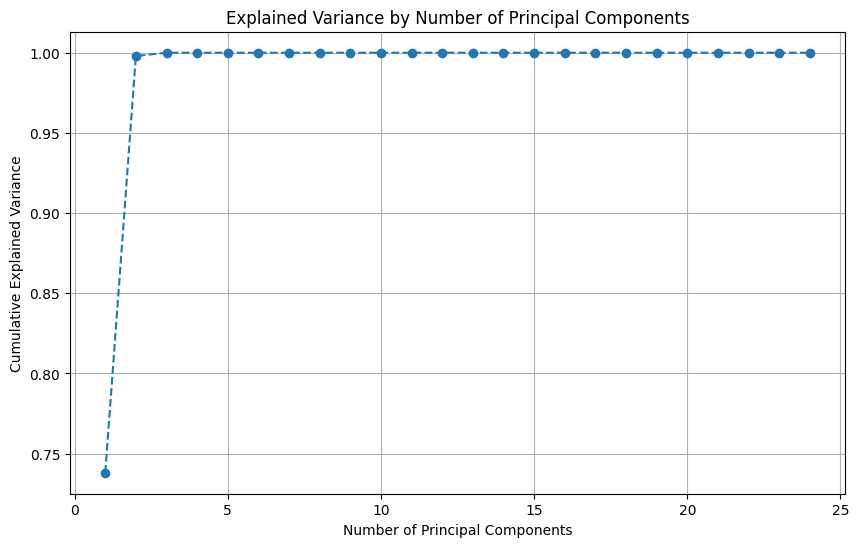

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(X_train_resampled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(X_train_resampled)
n_components=pca.n_components_
explained_variance=pca.explained_variance_ratio_
cumulative_variance=pca.explained_variance_ratio_.cumsum()

print(f"Selected number of components: {n_components}")
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative variance: {cumulative_variance}")
print()

pca_df=pd.DataFrame(pca_result)
pca_df.head()
X_test_resampled=pca.transform(X_test_resampled)

Selected number of components: 2
Explained variance ratio: [0.73810066 0.25982849]
Cumulative variance: [0.73810066 0.99792915]



=======================Model: Random_Forest ==========================
              Accuracy: 0.732776617954071
              AUC-ROC Curve : 0.7345
[[168  79]
 [ 49 183]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       247
           1       0.70      0.79      0.74       232

    accuracy                           0.73       479
   macro avg       0.74      0.73      0.73       479
weighted avg       0.74      0.73      0.73       479




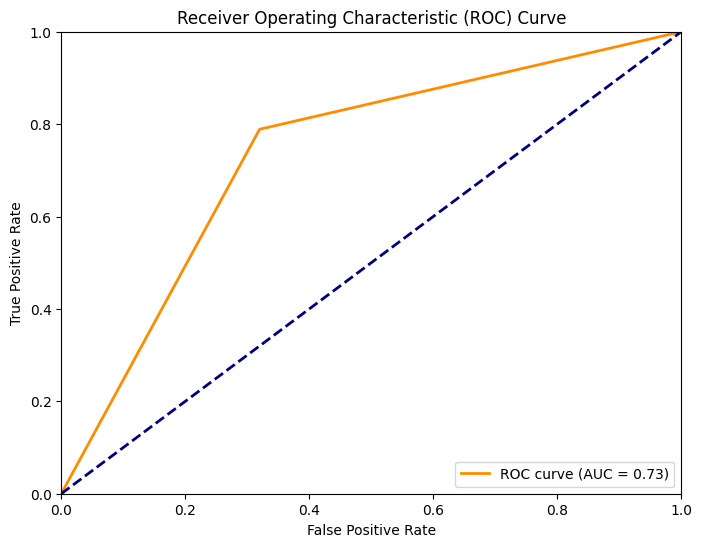

In [ ]:

helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

####HyperParameterTuning

Fitting 3 folds for each of 100 candidates, totalling 300 fits
=======================Model: Random_Forest ==========================
              Accuracy: 0.732776617954071
              AUC-ROC Curve : 0.7346
[[167  80]
 [ 48 184]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.72       247
           1       0.70      0.79      0.74       232

    accuracy                           0.73       479
   macro avg       0.74      0.73      0.73       479
weighted avg       0.74      0.73      0.73       479




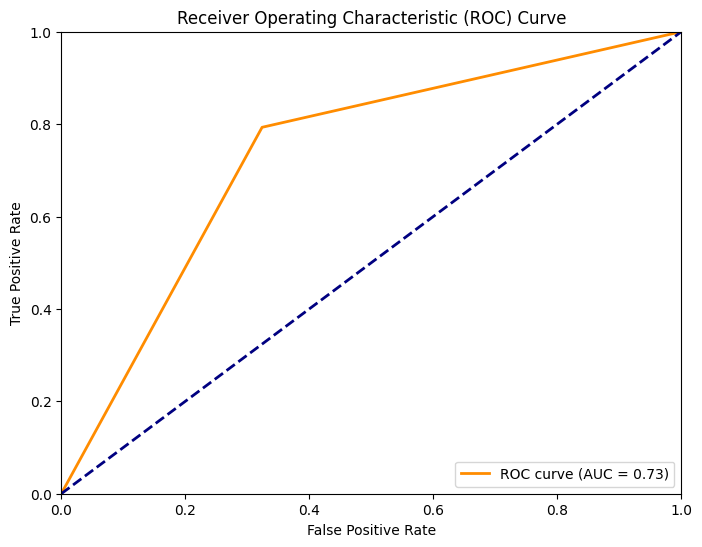

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
grid={'n_estimators':[100,200,300],
               'max_features': ['log2', 'sqrt'],
               'max_depth':[10,20,40,None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
}
rcv = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = grid,n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,rcv)


In [ ]:
rcv.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

####CROSS VALIDATION

In [ ]:

from sklearn.model_selection import cross_validate

def cross_val_evaluation(model, X, y):
    # Perform cross-validation with ROC AUC
    results = cross_validate(model, X, y, cv=5,
                             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                             return_train_score=False)

    # Calculate mean scores
    mean_accuracy = np.mean(results['test_accuracy'])
    mean_precision = np.mean(results['test_precision'])
    mean_recall = np.mean(results['test_recall'])
    mean_f1 = np.mean(results['test_f1'])
    mean_roc_auc = np.mean(results['test_roc_auc'])

    # Print results using f-strings
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean F1 Score: {mean_f1:.4f}")
    print(f"Mean ROC AUC: {mean_roc_auc:.4f}")

In [ ]:
cross_val_evaluation(RandomForestClassifier(),X_resampled,y_resampled)

Mean Accuracy: 0.8905
Mean Precision: 0.9156
Mean Recall: 0.8526
Mean F1 Score: 0.8726
Mean ROC AUC: 0.9602


# UNDERSAMPLING


## Random UnderSampling








=======================Model: Random_Forest ==========================
              Accuracy: 0.6842105263157895
              AUC-ROC Curve : 0.6846
[[31 17]
 [13 34]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67        48
           1       0.67      0.72      0.69        47

    accuracy                           0.68        95
   macro avg       0.69      0.68      0.68        95
weighted avg       0.69      0.68      0.68        95




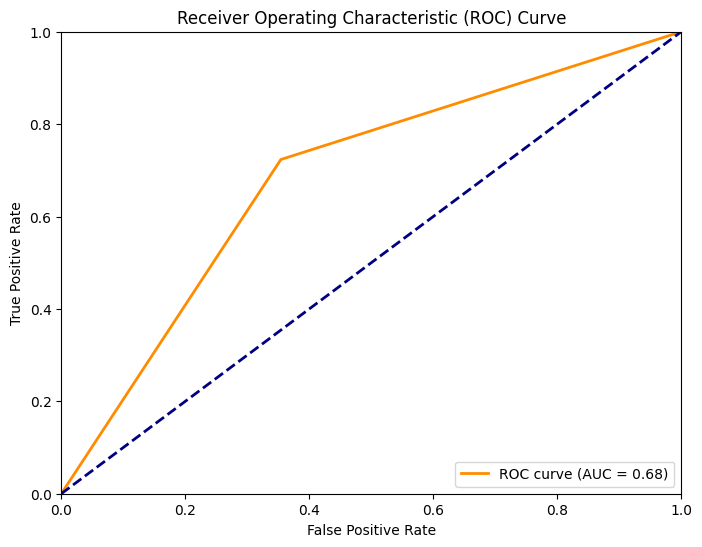

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=0)

X_resampled,y_resampled=rus.fit_resample(X,y)
X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled=train_test_split(X_resampled,y_resampled,stratify=y_resampled,test_size=0.2,random_state=42)
helper(X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

##### PCA

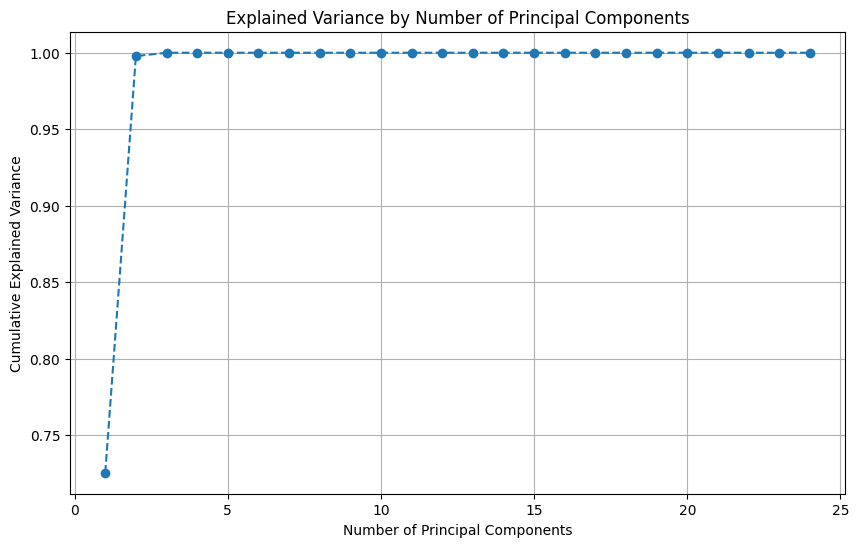

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(X_train_resampled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(X_train_resampled)
n_components=pca.n_components_
explained_variance=pca.explained_variance_ratio_
cumulative_variance=pca.explained_variance_ratio_.cumsum()

print(f"Selected number of components: {n_components}")
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative variance: {cumulative_variance}")
print()

pca_df=pd.DataFrame(pca_result)
pca_df.head()
X_test_resampled=pca.transform(X_test_resampled)

Selected number of components: 2
Explained variance ratio: [0.72559897 0.27219048]
Cumulative variance: [0.72559897 0.99778945]



=======================Model: Random_Forest ==========================
              Accuracy: 0.5263157894736842
              AUC-ROC Curve : 0.5266
[[24 24]
 [21 26]]
              precision    recall  f1-score   support

           0       0.53      0.50      0.52        48
           1       0.52      0.55      0.54        47

    accuracy                           0.53        95
   macro avg       0.53      0.53      0.53        95
weighted avg       0.53      0.53      0.53        95




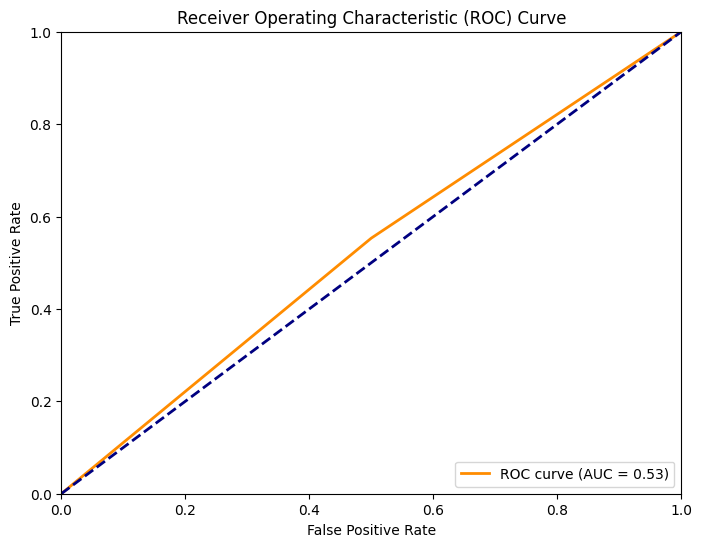

In [ ]:

helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

####HyperParameterTuning

Fitting 3 folds for each of 100 candidates, totalling 300 fits
=======================Model: Random_Forest ==========================
              Accuracy: 0.5368421052631579
              AUC-ROC Curve : 0.5377
[[22 26]
 [18 29]]
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        48
           1       0.53      0.62      0.57        47

    accuracy                           0.54        95
   macro avg       0.54      0.54      0.53        95
weighted avg       0.54      0.54      0.53        95




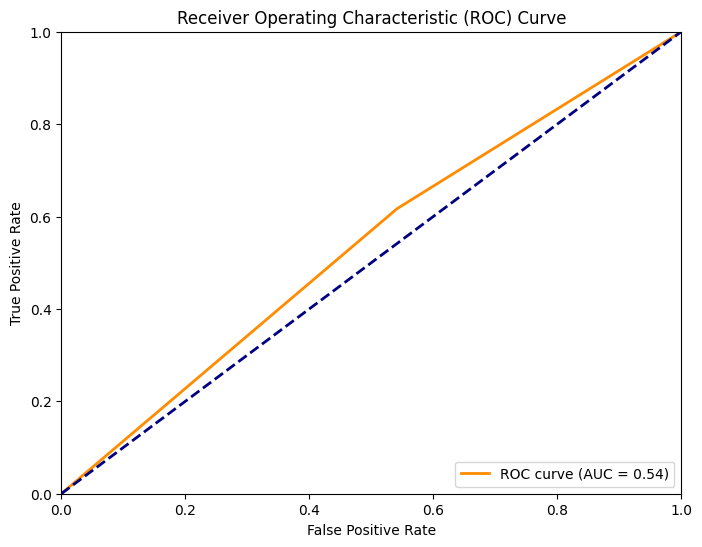

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid={'n_estimators':[100,200,300],
               'max_features': ['log2', 'sqrt'],
               'max_depth':[10,20,40,None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
}
rcv = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = grid,n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,rcv)


In [ ]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 10}

####CROSS VALIDATION

In [ ]:

from sklearn.model_selection import cross_validate
def cross_val_evaluation(model, X, y):
    # Perform cross-validation with ROC AUC
    results = cross_validate(model, X, y, cv=5,
                             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                             return_train_score=False)

    # Calculate mean scores
    mean_accuracy = np.mean(results['test_accuracy'])
    mean_precision = np.mean(results['test_precision'])
    mean_recall = np.mean(results['test_recall'])
    mean_f1 = np.mean(results['test_f1'])
    mean_roc_auc = np.mean(results['test_roc_auc'])

    # Print results using f-strings
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean F1 Score: {mean_f1:.4f}")
    print(f"Mean ROC AUC: {mean_roc_auc:.4f}")


In [ ]:
cross_val_evaluation(RandomForestClassifier(),X_resampled,y_resampled)

Mean Accuracy: 0.7193
Mean Precision: 0.7338
Mean Recall: 0.6963
Mean F1 Score: 0.7134
Mean ROC AUC: 0.7826


## UnderSampling Using Tomek Links






=======================Model: Random_Forest ==========================
              Accuracy: 0.8467153284671532
              AUC-ROC Curve : 0.5871
[[223   3]
 [ 39   9]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       226
           1       0.75      0.19      0.30        48

    accuracy                           0.85       274
   macro avg       0.80      0.59      0.61       274
weighted avg       0.83      0.85      0.81       274




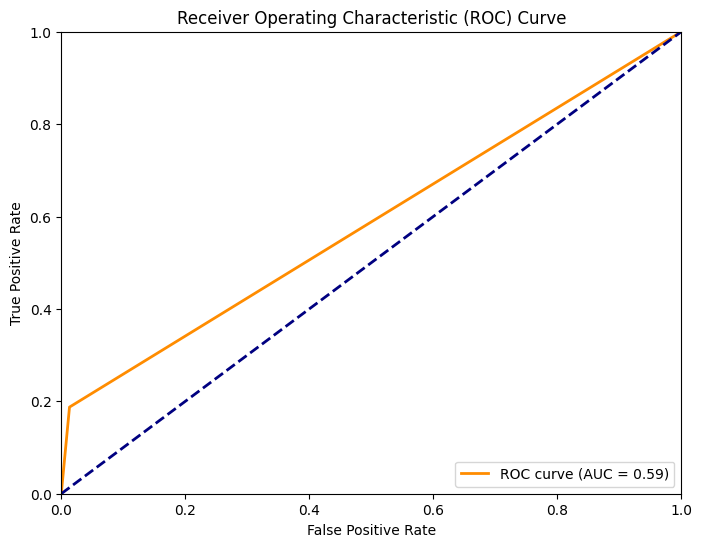

In [ ]:
from imblearn.under_sampling import TomekLinks
tl=TomekLinks(sampling_strategy='majority')
X_resampled,y_resampled=tl.fit_resample(X,y)
X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled=train_test_split(X_resampled,y_resampled,stratify=y_resampled,test_size=0.2,random_state=42)
helper(X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

##### PCA

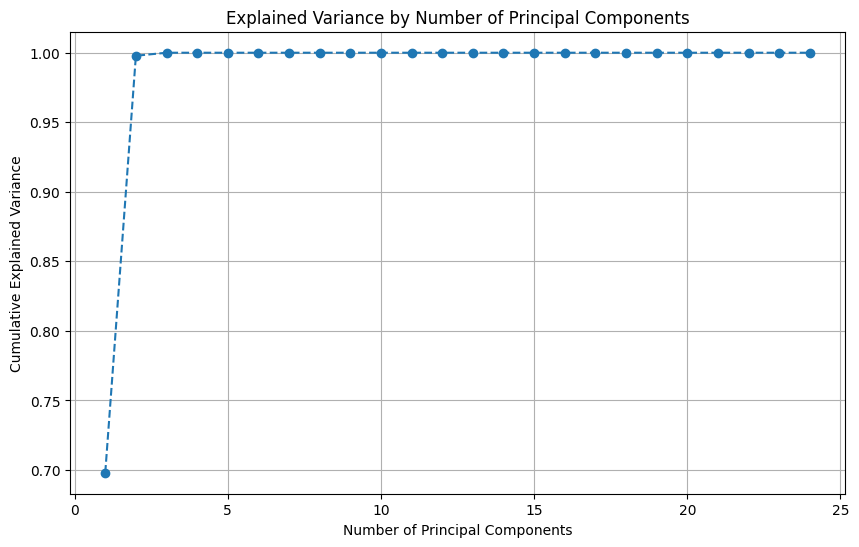

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(X_train_resampled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(X_train_resampled)
n_components=pca.n_components_
explained_variance=pca.explained_variance_ratio_
cumulative_variance=pca.explained_variance_ratio_.cumsum()

print(f"Selected number of components: {n_components}")
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative variance: {cumulative_variance}")
print()

pca_df=pd.DataFrame(pca_result)
pca_df.head()
X_test_resampled=pca.transform(X_test_resampled)

Selected number of components: 2
Explained variance ratio: [0.69800779 0.29981013]
Cumulative variance: [0.69800779 0.99781792]



=======================Model: Random_Forest ==========================
              Accuracy: 0.8248175182481752
              AUC-ROC Curve : 0.6067
[[213  13]
 [ 35  13]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       226
           1       0.50      0.27      0.35        48

    accuracy                           0.82       274
   macro avg       0.68      0.61      0.63       274
weighted avg       0.80      0.82      0.80       274




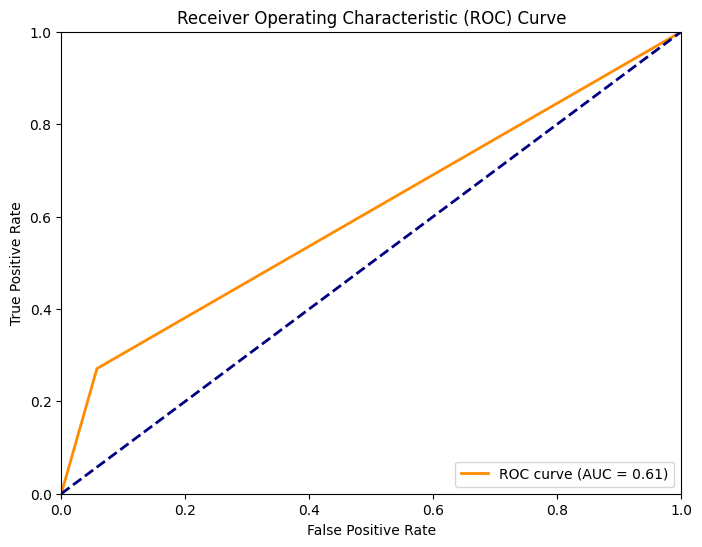

In [ ]:

helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

####HyperParameterTuning

Fitting 3 folds for each of 100 candidates, totalling 300 fits
=======================Model: Random_Forest ==========================
              Accuracy: 0.8138686131386861
              AUC-ROC Curve : 0.5508
[[216  10]
 [ 41   7]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       226
           1       0.41      0.15      0.22        48

    accuracy                           0.81       274
   macro avg       0.63      0.55      0.55       274
weighted avg       0.77      0.81      0.78       274




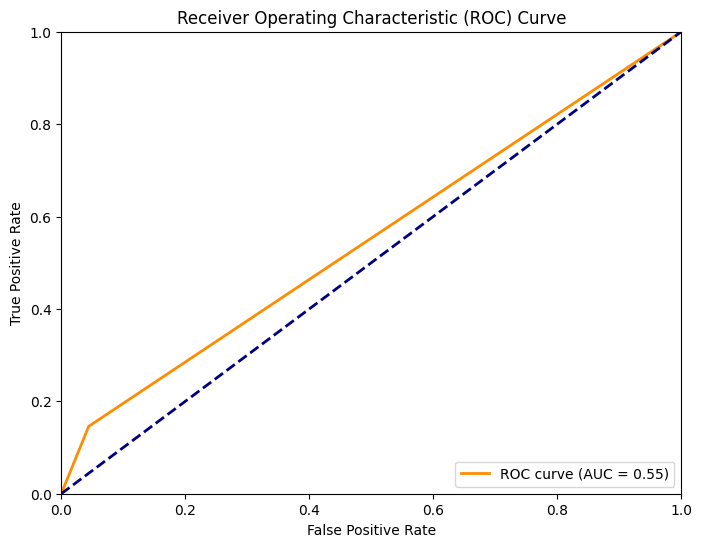

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
d= [int(x) for x in np.linspace(10, 150, num = 10)]

grid={'n_estimators':[100,200,300],
               'max_features': ['log2', 'sqrt'],
               'max_depth':[10,20,40,None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
}
rcv = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = grid,n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,rcv)


In [ ]:
rcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 10}

####CROSS VALIDATION

In [ ]:

from sklearn.model_selection import cross_validate

def cross_val_evaluation(model, X, y):
    # Perform cross-validation with ROC AUC
    results = cross_validate(model, X, y, cv=5,
                             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                             return_train_score=False)

    # Calculate mean scores
    mean_accuracy = np.mean(results['test_accuracy'])
    mean_precision = np.mean(results['test_precision'])
    mean_recall = np.mean(results['test_recall'])
    mean_f1 = np.mean(results['test_f1'])
    mean_roc_auc = np.mean(results['test_roc_auc'])

    # Print results using f-strings
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean F1 Score: {mean_f1:.4f}")
    print(f"Mean ROC AUC: {mean_roc_auc:.4f}")

In [ ]:
cross_val_evaluation(RandomForestClassifier(),X_resampled,y_resampled)

Mean Accuracy: 0.8471
Mean Precision: 0.7503
Mean Recall: 0.1857
Mean F1 Score: 0.2959
Mean ROC AUC: 0.7939


## Edited Nearest Neighbors (ENN)







=======================Model: Random_Forest ==========================
              Accuracy: 0.8164251207729468
              AUC-ROC Curve : 0.6183
[[157   3]
 [ 35  12]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       160
           1       0.80      0.26      0.39        47

    accuracy                           0.82       207
   macro avg       0.81      0.62      0.64       207
weighted avg       0.81      0.82      0.78       207




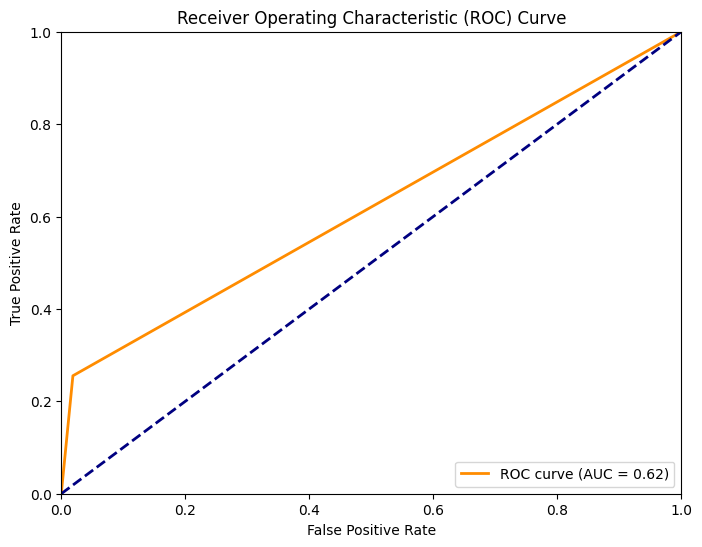

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
enn=EditedNearestNeighbours(sampling_strategy='majority')

X_resampled,y_resampled=enn.fit_resample(X,y)
X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled=train_test_split(X_resampled,y_resampled,stratify=y_resampled,test_size=0.2,random_state=42)
helper(X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

##### PCA

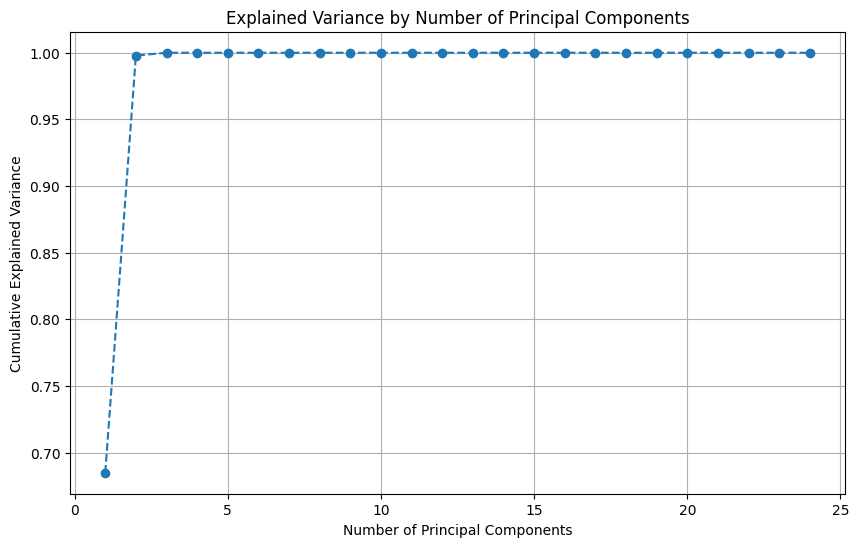

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(X_train_resampled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(X_train_resampled)
n_components=pca.n_components_
explained_variance=pca.explained_variance_ratio_
cumulative_variance=pca.explained_variance_ratio_.cumsum()

print(f"Selected number of components: {n_components}")
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative variance: {cumulative_variance}")
print()

pca_df=pd.DataFrame(pca_result)
pca_df.head()
X_test_resampled=pca.transform(X_test_resampled)

Selected number of components: 2
Explained variance ratio: [0.68490524 0.3129254 ]
Cumulative variance: [0.68490524 0.99783063]



=======================Model: Random_Forest ==========================
              Accuracy: 0.7922705314009661
              AUC-ROC Curve : 0.6402
[[147  13]
 [ 30  17]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       160
           1       0.57      0.36      0.44        47

    accuracy                           0.79       207
   macro avg       0.70      0.64      0.66       207
weighted avg       0.77      0.79      0.77       207




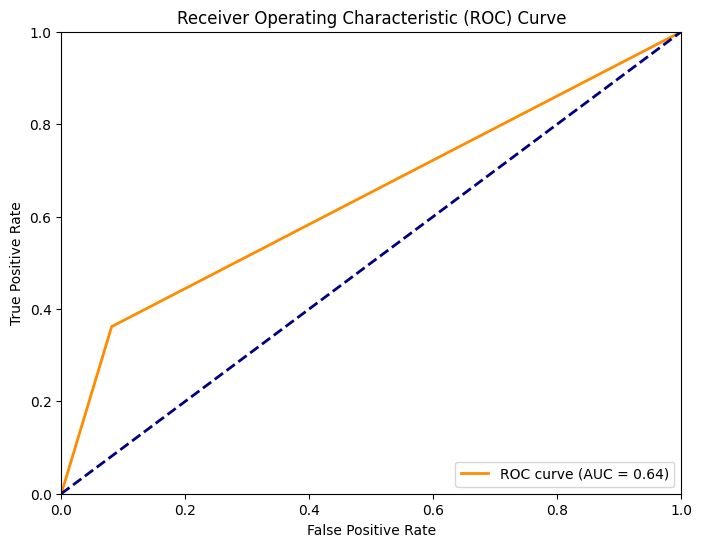

In [ ]:

helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

####HyperParameterTuning

Fitting 3 folds for each of 100 candidates, totalling 300 fits
=======================Model: Random_Forest ==========================
              Accuracy: 0.782608695652174
              AUC-ROC Curve : 0.6039
[[149  11]
 [ 34  13]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       160
           1       0.54      0.28      0.37        47

    accuracy                           0.78       207
   macro avg       0.68      0.60      0.62       207
weighted avg       0.75      0.78      0.75       207




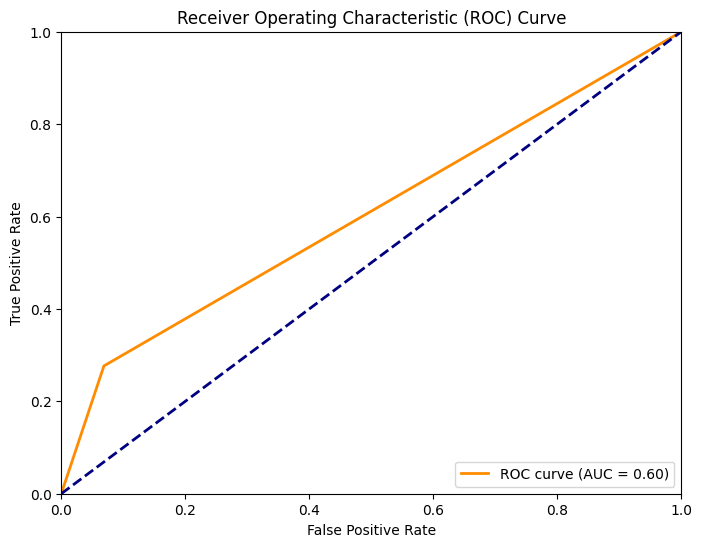

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid={'n_estimators':[100,200,300],
               'max_features': ['log2', 'sqrt'],
               'max_depth':[10,20,40,None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
}
rcv = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = grid,n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,rcv)


In [ ]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 40}

####CROSS VALIDATION

In [ ]:

from sklearn.model_selection import cross_validate
def cross_val_evaluation(model, X, y):
    # Perform cross-validation with ROC AUC
    results = cross_validate(model, X, y, cv=5,
                             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                             return_train_score=False)

    # Calculate mean scores
    mean_accuracy = np.mean(results['test_accuracy'])
    mean_precision = np.mean(results['test_precision'])
    mean_recall = np.mean(results['test_recall'])
    mean_f1 = np.mean(results['test_f1'])
    mean_roc_auc = np.mean(results['test_roc_auc'])

    # Print results using f-strings
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean F1 Score: {mean_f1:.4f}")
    print(f"Mean ROC AUC: {mean_roc_auc:.4f}")

In [ ]:
cross_val_evaluation(RandomForestClassifier(),X_resampled,y_resampled)

Mean Accuracy: 0.8219
Mean Precision: 0.7690
Mean Recall: 0.3288
Mean F1 Score: 0.4549
Mean ROC AUC: 0.8243


# HYBRID


## SMOTE-TomekLinks






=======================Model: Random_Forest ==========================
              Accuracy: 0.9017094017094017
              AUC-ROC Curve : 0.9017
[[215  19]
 [ 27 207]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       234
           1       0.92      0.88      0.90       234

    accuracy                           0.90       468
   macro avg       0.90      0.90      0.90       468
weighted avg       0.90      0.90      0.90       468




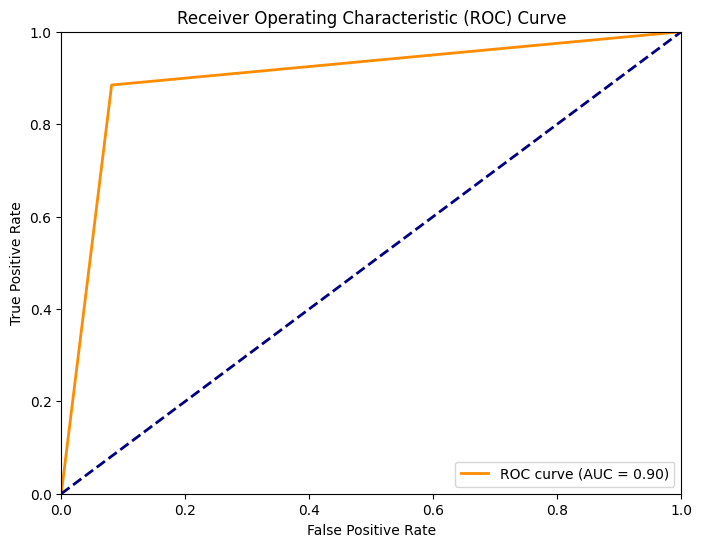

In [ ]:

from imblearn.combine import SMOTETomek
smotetomek = SMOTETomek(random_state=0)
X_resampled,y_resampled=smotetomek.fit_resample(X,y)
X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled=train_test_split(X_resampled,y_resampled,stratify=y_resampled,test_size=0.2,random_state=42)
helper(X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

##### PCA

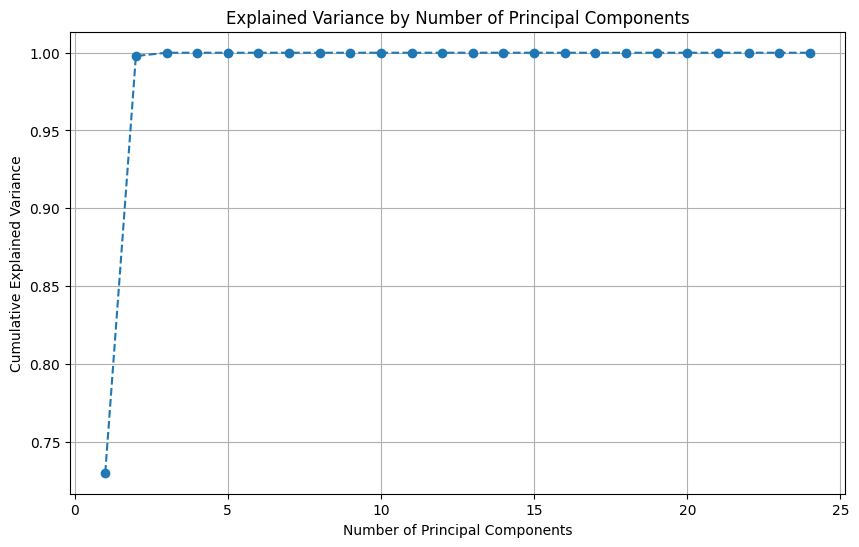

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(X_train_resampled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(X_train_resampled)
n_components=pca.n_components_
explained_variance=pca.explained_variance_ratio_
cumulative_variance=pca.explained_variance_ratio_.cumsum()

print(f"Selected number of components: {n_components}")
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative variance: {cumulative_variance}")
print()

pca_df=pd.DataFrame(pca_result)
pca_df.head()
X_test_resampled=pca.transform(X_test_resampled)

Selected number of components: 2
Explained variance ratio: [0.72994832 0.26792734]
Cumulative variance: [0.72994832 0.99787566]



=======================Model: Random_Forest ==========================
              Accuracy: 0.7670940170940171
              AUC-ROC Curve : 0.7671
[[166  68]
 [ 41 193]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       234
           1       0.74      0.82      0.78       234

    accuracy                           0.77       468
   macro avg       0.77      0.77      0.77       468
weighted avg       0.77      0.77      0.77       468




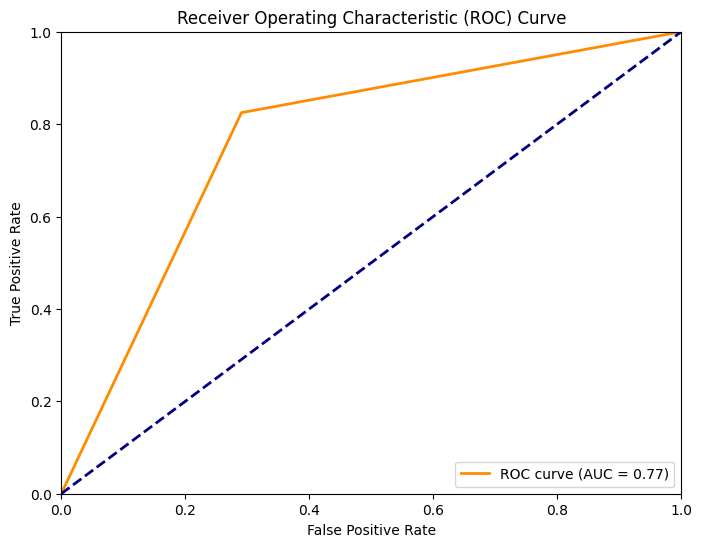

In [ ]:

helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

####HyperParameterTuning

Fitting 3 folds for each of 100 candidates, totalling 300 fits
=======================Model: Random_Forest ==========================
              Accuracy: 0.7713675213675214
              AUC-ROC Curve : 0.7714
[[165  69]
 [ 38 196]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       234
           1       0.74      0.84      0.79       234

    accuracy                           0.77       468
   macro avg       0.78      0.77      0.77       468
weighted avg       0.78      0.77      0.77       468




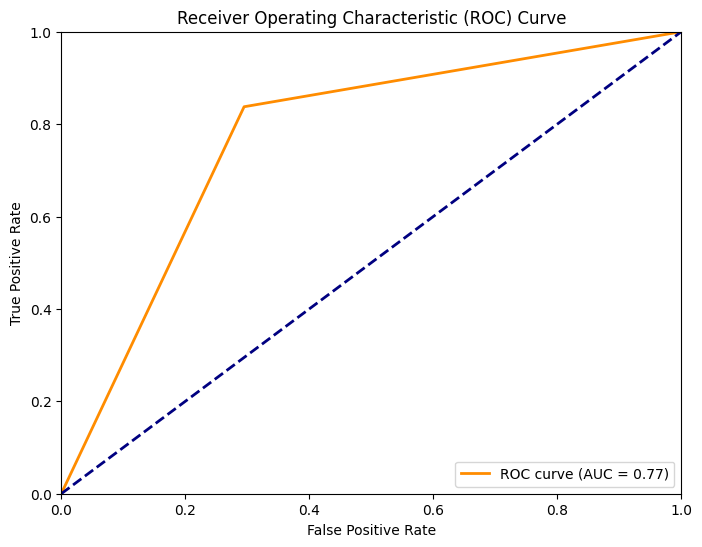

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid={'n_estimators':[100,200,300],
               'max_features': ['log2', 'sqrt'],
               'max_depth':[10,20,40,None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
}
rcv = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = grid,n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,rcv)


In [ ]:
rcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 40}

####CROSS VALIDATION

In [ ]:

from sklearn.model_selection import cross_validate

def cross_val_evaluation(model, X, y):
    # Perform cross-validation with ROC AUC
    results = cross_validate(model, X, y, cv=5,
                             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                             return_train_score=False)

    # Calculate mean scores
    mean_accuracy = np.mean(results['test_accuracy'])
    mean_precision = np.mean(results['test_precision'])
    mean_recall = np.mean(results['test_recall'])
    mean_f1 = np.mean(results['test_f1'])
    mean_roc_auc = np.mean(results['test_roc_auc'])

    # Print results using f-strings
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean F1 Score: {mean_f1:.4f}")
    print(f"Mean ROC AUC: {mean_roc_auc:.4f}")


In [ ]:
cross_val_evaluation(RandomForestClassifier(),X_resampled,y_resampled)

Mean Accuracy: 0.8999
Mean Precision: 0.9167
Mean Recall: 0.8803
Mean F1 Score: 0.8874
Mean ROC AUC: 0.9651


##  SMOTE-ENN






=======================Model: Random_Forest ==========================
              Accuracy: 0.9115646258503401
              AUC-ROC Curve : 0.9127
[[118  10]
 [ 16 150]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       128
           1       0.94      0.90      0.92       166

    accuracy                           0.91       294
   macro avg       0.91      0.91      0.91       294
weighted avg       0.91      0.91      0.91       294




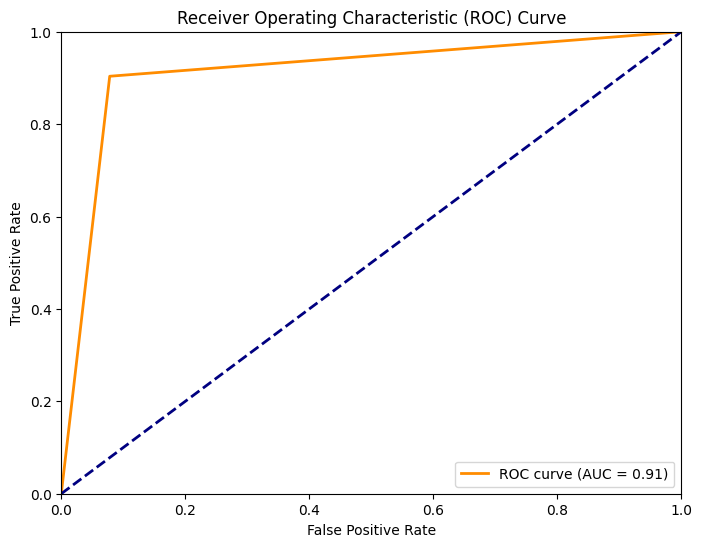

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split

smoteenn = SMOTEENN(random_state=0)

X_resampled, y_resampled = smoteenn.fit_resample(X, y)

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42)
helper(X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

In [ ]:
print(X_train_resampled.shape)
print(X_test_resampled.shape)
print(y_train_resampled.shape)
print(y_test_resampled.shape)

(1175, 24)
(294, 24)
(1175,)
(294,)


##### PCA

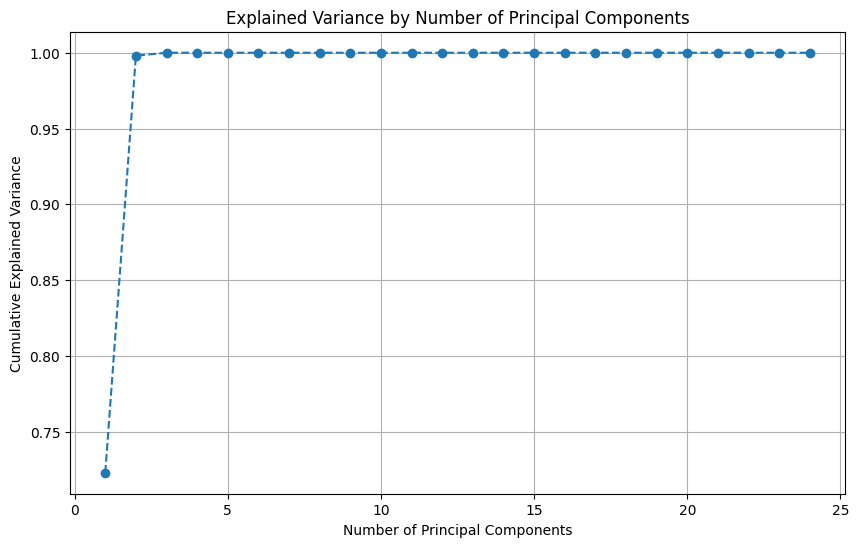

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(X_train_resampled)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(X_train_resampled)
n_components=pca.n_components_
explained_variance=pca.explained_variance_ratio_
cumulative_variance=pca.explained_variance_ratio_.cumsum()

print(f"Selected number of components: {n_components}")
print(f"Explained variance ratio: {explained_variance}")
print(f"Cumulative variance: {cumulative_variance}")
print()

pca_df=pd.DataFrame(pca_result)
pca_df.head()
X_test_resampled=pca.transform(X_test_resampled)

Selected number of components: 2
Explained variance ratio: [0.72291268 0.27511108]
Cumulative variance: [0.72291268 0.99802376]



In [ ]:
#X_train_resampled.shape
pca_df.shape

(1175, 2)

=======================Model: Random_Forest ==========================
              Accuracy: 0.8775510204081632
              AUC-ROC Curve : 0.8630
[[ 96  32]
 [  4 162]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       128
           1       0.84      0.98      0.90       166

    accuracy                           0.88       294
   macro avg       0.90      0.86      0.87       294
weighted avg       0.89      0.88      0.87       294




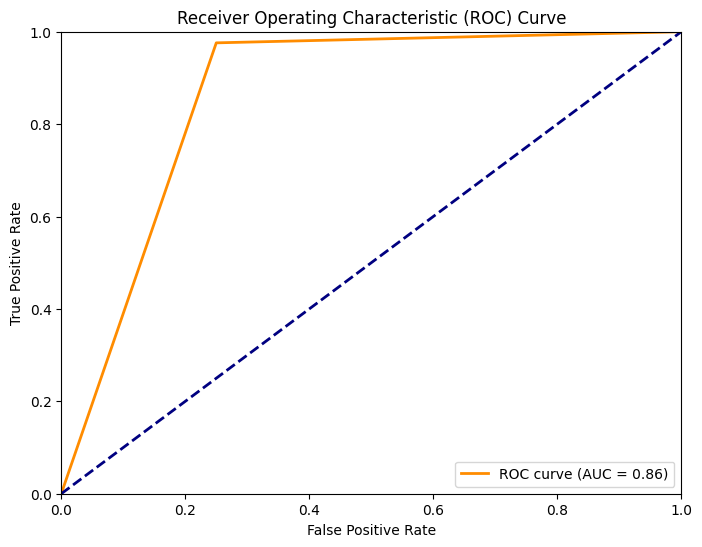

In [ ]:

helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,RandomForestClassifier())

####HyperParameterTuning

Fitting 3 folds for each of 100 candidates, totalling 300 fits
=======================Model: Random_Forest ==========================
              Accuracy: 0.8843537414965986
              AUC-ROC Curve : 0.8708
[[ 98  30]
 [  4 162]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85       128
           1       0.84      0.98      0.91       166

    accuracy                           0.88       294
   macro avg       0.90      0.87      0.88       294
weighted avg       0.89      0.88      0.88       294




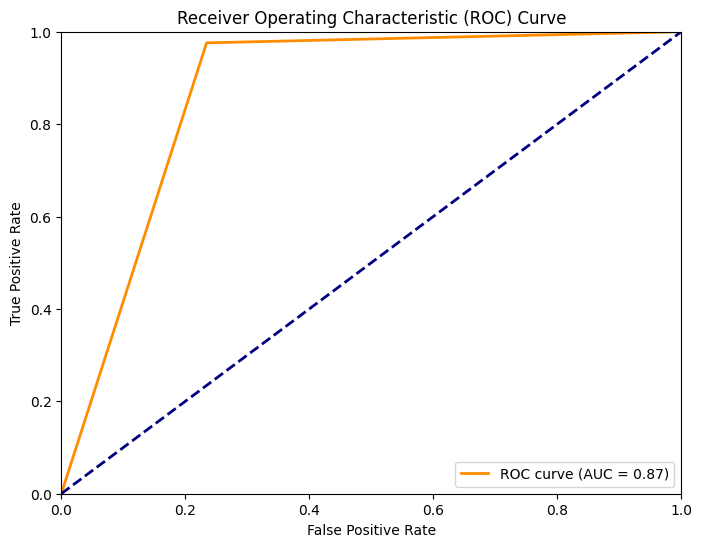

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid={'n_estimators':[100,200,300],
               'max_features': ['log2', 'sqrt'],
               'max_depth':[10,20,40,None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
}
rcv = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = grid,n_iter = 100, cv = 3, verbose=2, random_state=0, n_jobs = -1)
helper(pca_df,X_test_resampled,y_train_resampled,y_test_resampled,rcv)


In [ ]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 40}

####CROSS VALIDATION

In [ ]:

from sklearn.model_selection import cross_validate

def cross_val_evaluation(model, X, y):
    # Perform cross-validation with ROC AUC
    results = cross_validate(model, X, y, cv=5,
                             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'),
                             return_train_score=False)

    # Calculate mean scores
    mean_accuracy = np.mean(results['test_accuracy'])
    mean_precision = np.mean(results['test_precision'])
    mean_recall = np.mean(results['test_recall'])
    mean_f1 = np.mean(results['test_f1'])
    mean_roc_auc = np.mean(results['test_roc_auc'])

    # Print results using f-strings
    print(f"Mean Accuracy: {mean_accuracy:.4f}")
    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean F1 Score: {mean_f1:.4f}")
    print(f"Mean ROC AUC: {mean_roc_auc:.4f}")


In [ ]:
cross_val_evaluation(RandomForestClassifier(),X_resampled,y_resampled)

Mean Accuracy: 0.9231
Mean Precision: 0.9345
Mean Recall: 0.9277
Mean F1 Score: 0.9285
Mean ROC AUC: 0.9766
